# Créer son premier modèle en Scikit-Learn

## Chargement des données

In [1]:
# Import du fichier CSV
import pandas as pd

iris_df = pd.read_csv('iris.csv')

In [2]:
# Affichage des premières lignes
iris_df.head()

sepal_length  sepal_width  petal_length  petal_width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa

In [3]:
# Taille du dataset sous la forme (nb lignes, nb colonnes)
iris_df.shape

(150, 5)

## Analyse du dataset

In [4]:
# Statistiques descriptives
iris_df.describe()

sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000

<Axes: >

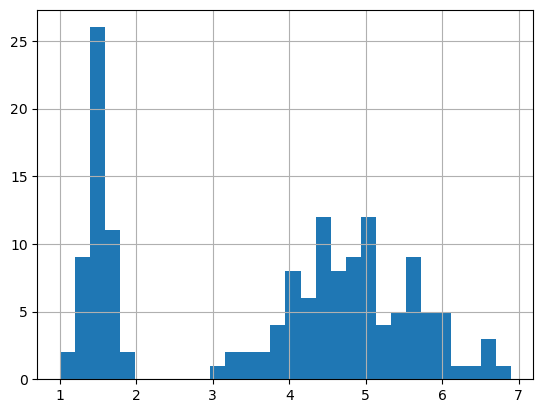

In [5]:
# Histogramme des longueurs de pétales
iris_df['petal_length'].hist(bins=30)

<Axes: title={'center': 'petal_length'}, xlabel='class'>

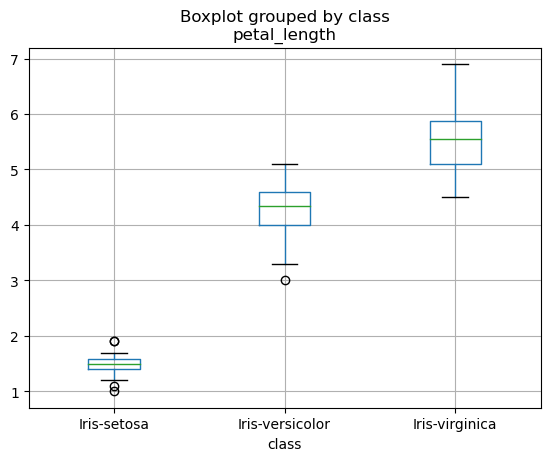

In [6]:
# Graphique comparant les tailles des pétales par espèce (boxplot)
iris_df.boxplot(by='class', column=['petal_length'])

## Préparation des données

In [7]:
# Données manquantes ?
iris_df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
class           0
dtype: int64

## Entrainement de modèles et évaluation

In [8]:
# Séparation cible (y) vs variables explicatives (X)
y = iris_df['class']
X = iris_df.drop(['class'], axis=1)

In [9]:
# Séparation train vs test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Standardisation des données
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
# Entrainement
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=2)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)

In [12]:
# Rapport de classification
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.89      0.94         9
 Iris-virginica       0.92      1.00      0.96        11

       accuracy                           0.97        30
      macro avg       0.97      0.96      0.97        30
   weighted avg       0.97      0.97      0.97        30



In [13]:
# Matrice de confusion
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[10,  0,  0],
       [ 0,  8,  1],
       [ 0,  0, 11]])